## 2nd-degree classification through multi-way IBD sharing 
A rebuild base on CREST ([Qiao et al. (2019)](https://www.sciencedirect.com/science/article/pii/S0002929720304407))

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
import os

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']
plt.rcParams['font.size'] = 15
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

### Read IBD data of BLG and reference datasets

In [ ]:
seg_qwg = pd.read_csv('./segs/qwg_ch_all.seg',sep='\t', header=None)
coef_qwg = pd.read_csv('./segs/qwg_ch_all.coef',sep='\t', header=None)

seg_BLG = pd.read_csv('./segs/BLG_ch_all.seg',sep='\t', header=None)
coef_BLG = pd.read_csv('./segs/BLG_ch_all.coef',sep='\t', header=None)

### Run multi-way IBD sharing statistics and plot results

In [3]:
from multi_way_IBD import get_R1_R2
from plot_results import plot_scatter, plot_hist, plot_scatter_overlap

In [9]:
all_R1_R2s_BLG, all_y_lists = get_R1_R2(seg_BLG, coef_BLG, order_thres = (3,5),return_length=True)
all_R1_R2s_reorder_BLG = get_R1_R2(seg_BLG, coef_BLG, order_thres = (3,5), reorder = True)

Detected 6 intersections.
Detected 8 intersections.
Detected 20 intersections.
Detected 2 intersections.
Detected 2 intersections.
Detected 6 intersections.
Detected 6 intersections.
Detected 20 intersections.
Detected 6 intersections.
Detected 20 intersections.
Detected 6 intersections.
Detected 8 intersections.
Detected 20 intersections.
Detected 2 intersections.
Detected 2 intersections.
Detected 6 intersections.
Detected 6 intersections.
Detected 20 intersections.
Detected 6 intersections.
Detected 20 intersections.


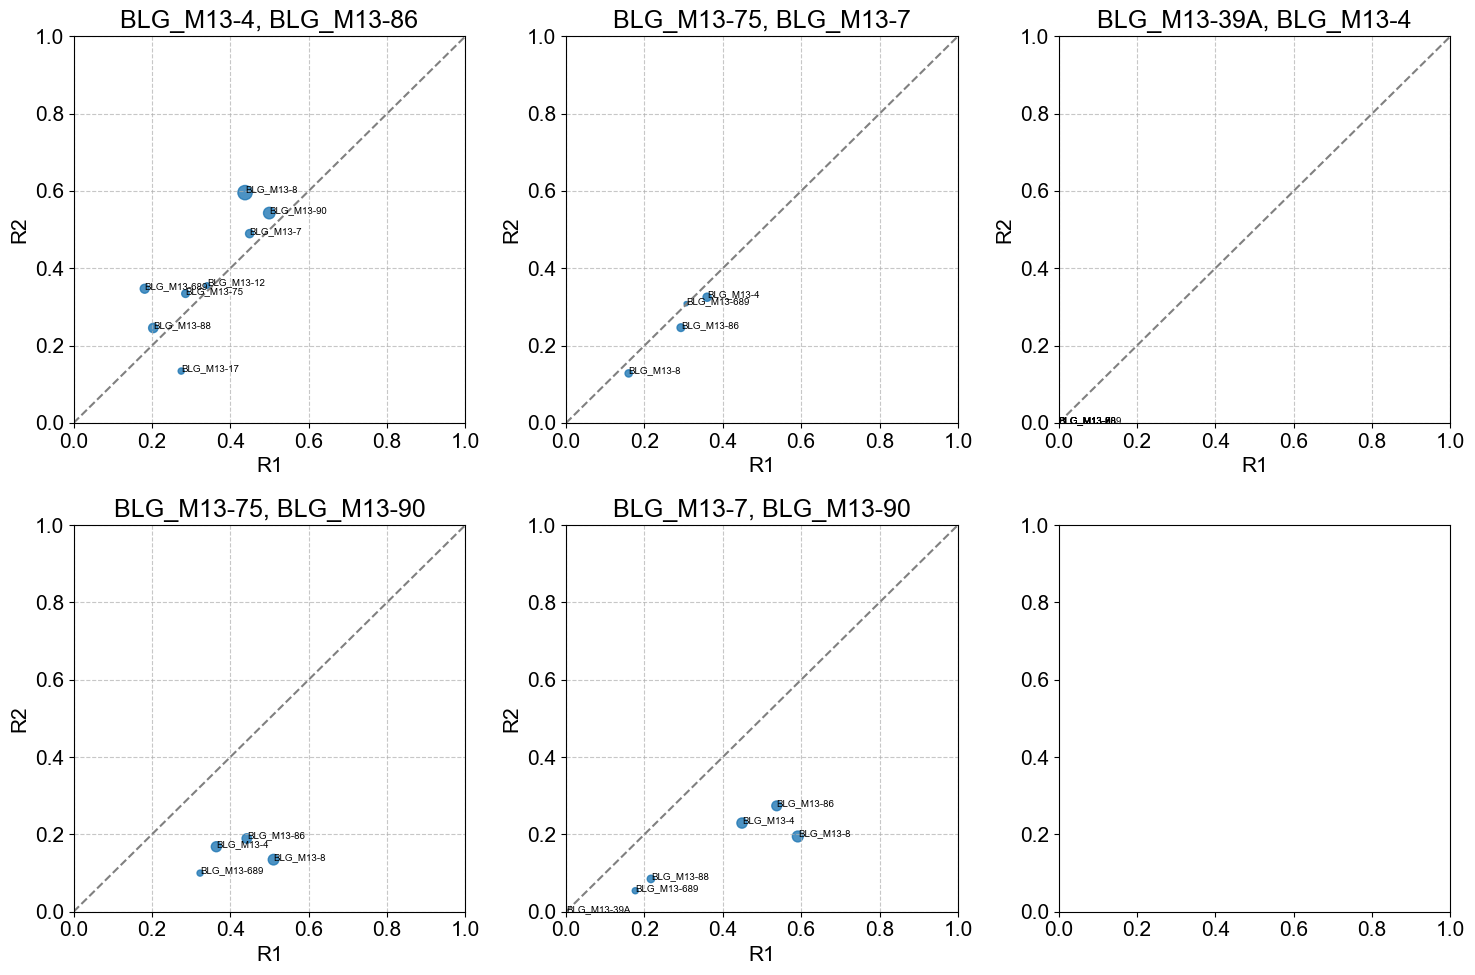

In [10]:
fig_BLG = plot_scatter(all_R1_R2s_BLG, show_size=True, y_names = all_y_lists)

## save results
import pickle
with open('./validation_pedsim/BLG_R1R2_35.data','wb') as file_handle:
    pickle.dump(all_R1_R2s_BLG, file_handle)

### Save data file

In [12]:
os.makedirs("./plots", exist_ok=True)
list1 = all_R1_R2s_BLG
list2 = all_y_lists

with open('./plots/Fig_4C_data.txt', 'w') as f:
    main_headers = []
    for item in list1:
        main_header = f"({item[0][0]}, {item[0][1]})" 
        main_headers.extend([main_header, "", "", ""]) 
    f.write("\t".join(main_headers) + "\n")
    
    sub_headers = ["y", "(degree1, degree2)","R1", "R2"] * len(list1) 
    f.write("\t".join(sub_headers) + "\n")
    
    max_rows = max(len(item[1]) for item in list1)
    for i in range(max_rows):
        row = []
        for idx, item in enumerate(list1):
            if idx < len(list2) and i < len(list2[idx]):
                name, num_group = list2[idx][i]
                row.extend([name, f"({num_group[0]}, {num_group[1]})"])
            else:
                row.extend(["", ""]) 
            
            array1 = item[1] 
            if i < len(array1):
                row.extend([str(array1[i][0]), str(array1[i][1])])
            else:
                row.extend(["", ""]) 
        f.write("\t".join(row) + "\n")

## Miscellaneous

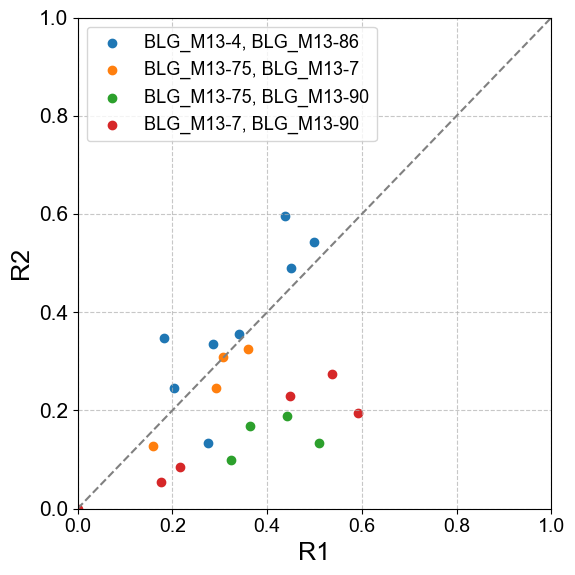

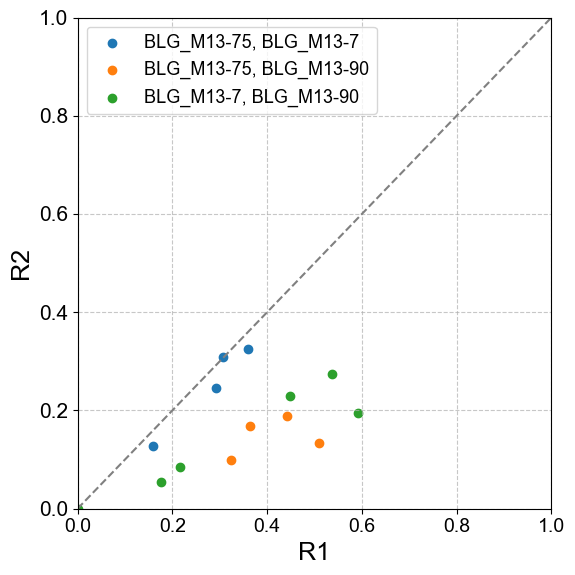

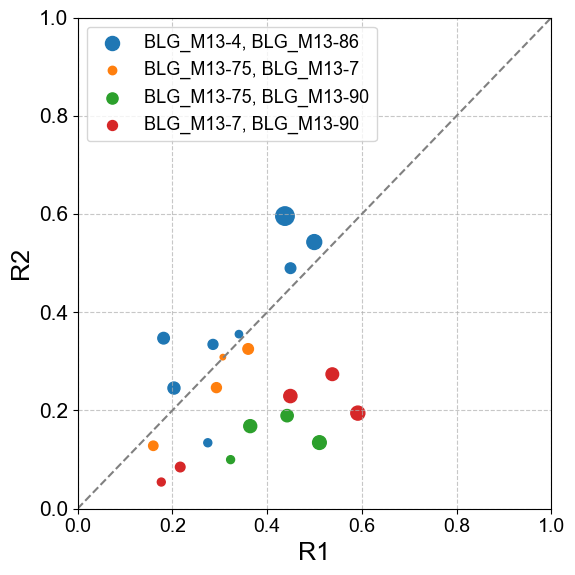

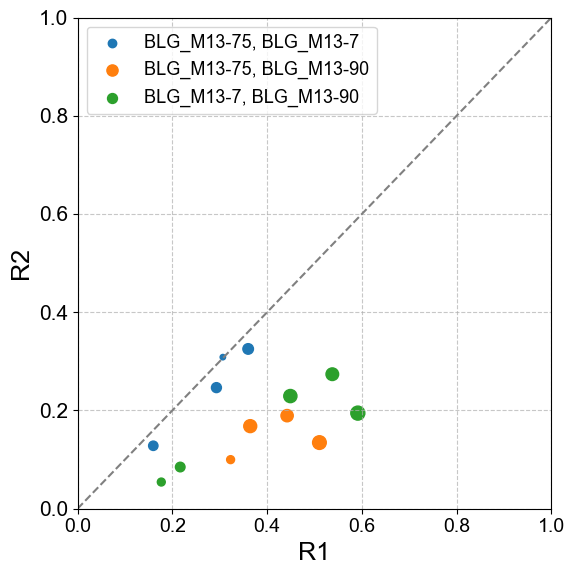

In [13]:
import datetime
from matplotlib.backends.backend_pdf import PdfPages
timestamp = datetime.datetime.now().strftime("%Y_%m_%d_%H_%M_%S")
pdf = PdfPages(f'../plots/BLG_CREST_R1R2_{timestamp}.pdf')

fig1 = plot_scatter_overlap(all_R1_R2s_BLG, use_inds=[0,1,3,4])
fig2 = plot_scatter_overlap(all_R1_R2s_BLG, use_inds=[1,3,4])
fig3 = plot_scatter_overlap(all_R1_R2s_BLG, use_inds=[0,1,3,4], show_size=True)
fig4 = plot_scatter_overlap(all_R1_R2s_BLG, use_inds=[1,3,4], show_size=True)

# for fign in [fig1,fig2,fig3,fig4]:
#     pdf.savefig(fign, bbox_inches='tight')
# pdf.close()